# Chapter 11 - Fourier analysis

In [1]:
## Building a square wave

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mplines

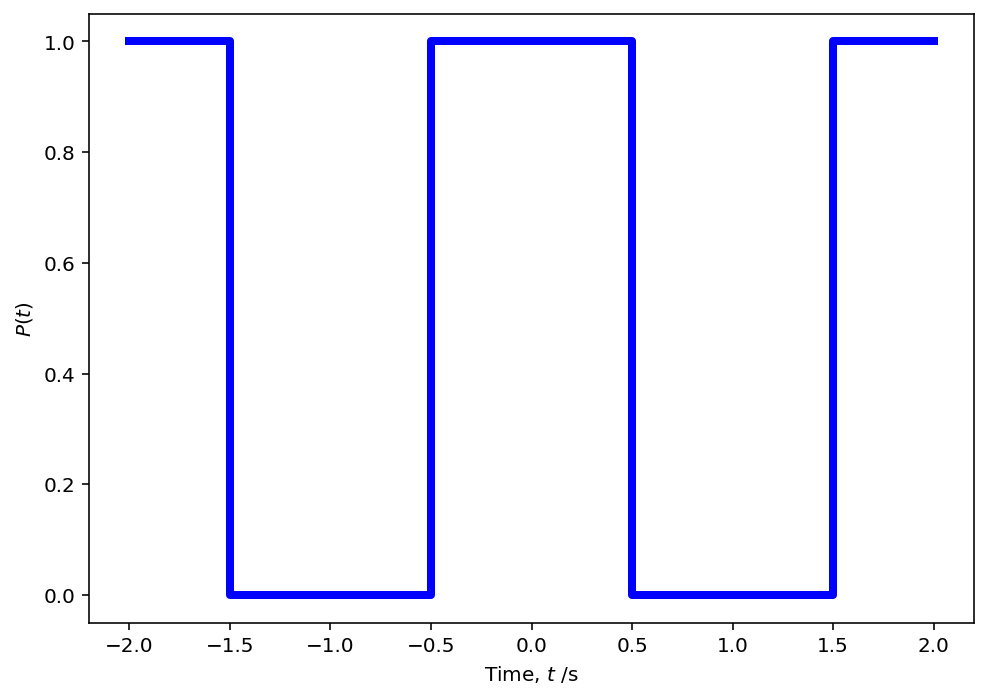

In [3]:
input_x = np.arange(-2,2.5,1)
input_amp = [1,0,1,0,1]
#plt.plot(input_amp, marker='d', color='blue')
plt.figure(figsize=(7,5))
plt.plot(input_x,input_amp, marker='', color='blue',lw=4, drawstyle='steps-mid')
#plt.title("Square wave")
plt.ylabel('$P(t)$')
plt.xlabel("Time, $t$ /s")

plt.tight_layout()


plt.savefig("ch11-squarewave1.svg",transparent=True)
plt.savefig("ch11-squarewave1.pdf",transparent=True)
plt.show()

In [4]:
len(input_x)

5

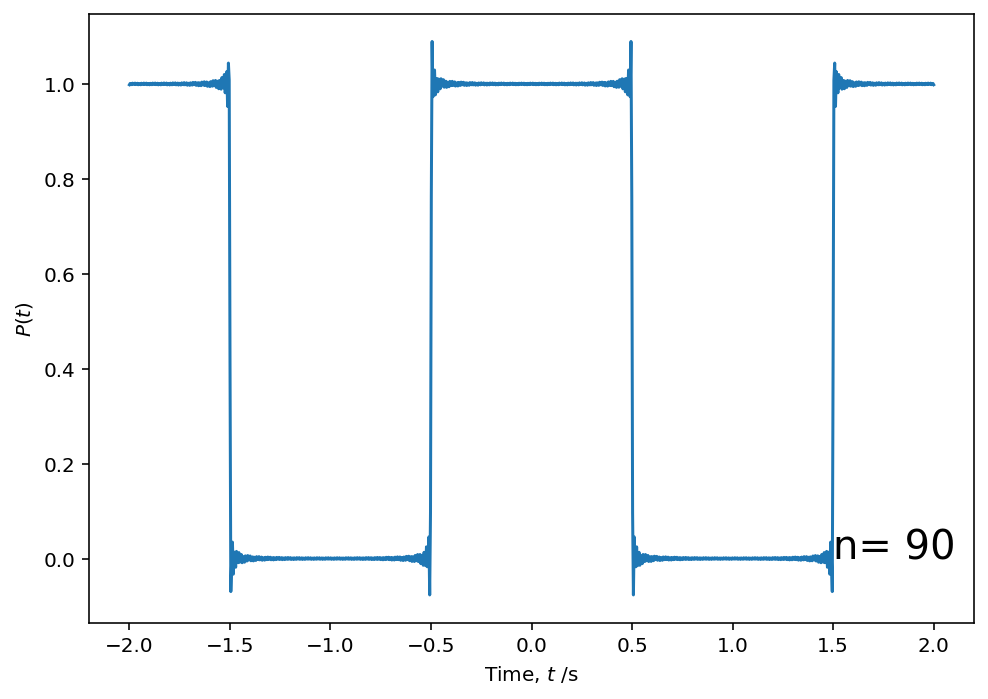

In [5]:
time_t = np.linspace(-2,2,1000)
term_0 = 0.5
series_lim = 90
n = np.arange(1,series_lim+1)

#def fourier1(n,x):
#    term = (2/np.pi)*(np.cos(n*np.pi*x)/n)*((-1)**(n*(n-2)*0.5))
#    return term

pulse_data = np.zeros(len(time_t),dtype=float)

def fourier(n,x):
    term = ((np.cos((2*n-1)*np.pi*x))/(2*n-1))*((-1)**(n+1))
    return term

for i in n:
    fourier_term = fourier(i,time_t)
    np.add(fourier_term,pulse_data,out=pulse_data)
    
plt.figure(figsize=(7,5))


plt.plot(time_t,(0.5+(2/np.pi)*pulse_data),label='n = '+str(series_lim))


plt.ylabel('$P(t)$')
plt.xlabel("Time, $t$ /s")
#plt.legend(loc='lower right')
plt.text(1.5, 0, 'n= '+str(series_lim),fontsize='20' )

plt.tight_layout()


plt.savefig("ch11-fouriersum"+str(series_lim)+".svg",transparent=True)
plt.savefig("ch11-fouriersum"+str(series_lim)+".pdf",transparent=True)
plt.show()

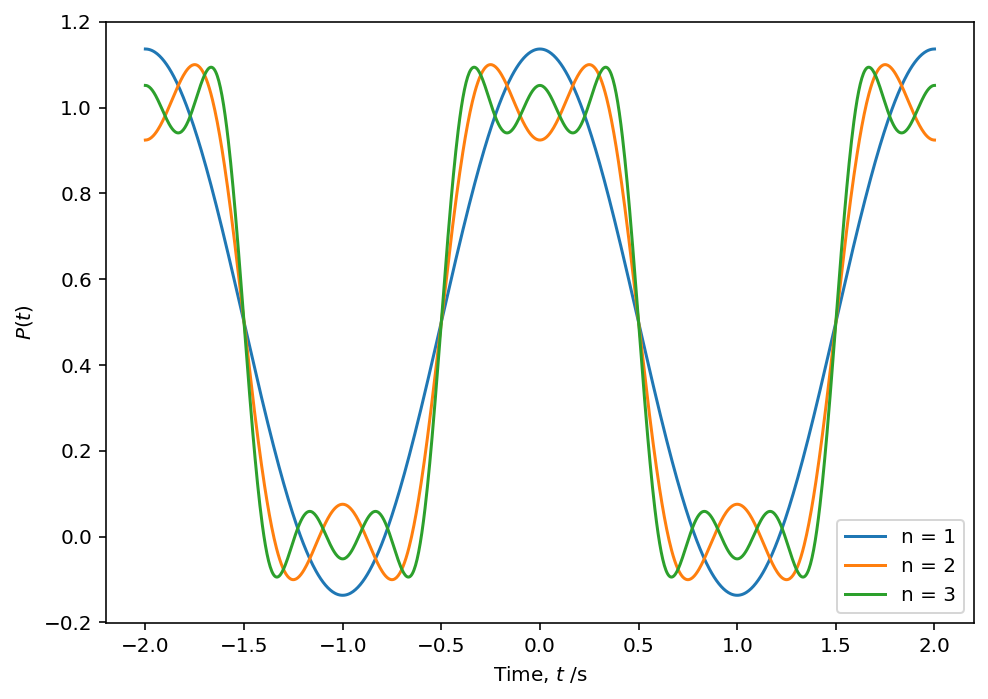

In [6]:
time_t = np.linspace(-2,2,1000)
term_0 = 0.5
series_lim = 5
#n = np.arange(1,series_lim+1)
n = [1,2,3]
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k']

#def fourier1(n,x):
#    term = (2/np.pi)*(np.cos(n*np.pi*x)/n)*((-1)**(n*(n-2)*0.5))
#    return term

pulse_data = np.zeros(len(time_t),dtype=float)

def fourier(n,x):
    term = ((np.cos((2*n-1)*np.pi*x))/(2*n-1))*((-1)**(n+1))
    return term

fig=plt.figure(figsize=(7,5))


#def series(n,x)
for i in n:
    fourier_term = fourier(i,time_t)
    np.add(fourier_term,pulse_data,out=pulse_data)
    plt.plot(time_t,(0.5+(2/np.pi)*pulse_data),label='n = '+str(i))
    

#plt.plot(time_t,(0.5+(2/np.pi)*pulse_data))

plt.ylabel('$P(t)$')
plt.xlabel("Time, $t$ /s")
plt.legend(loc='lower right')
plt.tight_layout()


plt.savefig("ch11-fouriersum"+str(series_lim)+".svg",transparent=True)
plt.savefig("ch11-fouriersum"+str(series_lim)+".pdf",transparent=True)
plt.show()

### Simulating a musical instrument...


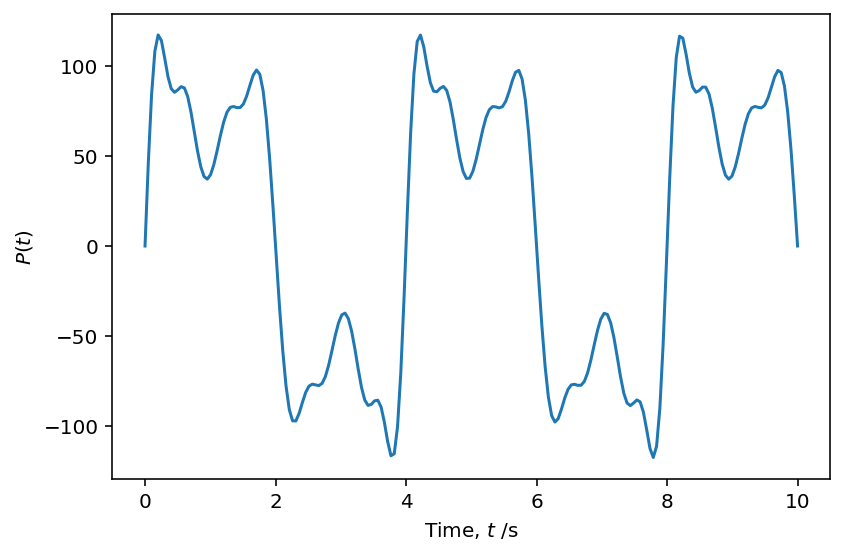

In [18]:
time_range = np.linspace(0,10,200)
length_L = 2 # Tube length
n_harm = 10
harmonics=np.arange(1,n_harm+1)
harm_int_clar = [91,3.6,54.7,6.8,16,1.5,16.5,7.3,3.4,2]
harm_int_oboe = [23,89,39,46.3,10,19,6.3,12.5,2.5,2]
harm_int_fork = [100,0,0,0,0,0,0,0,0,0]

# Define the harmonic series

harm_data = np.zeros(len(time_range),dtype=float)

def harmonic(A,n):
    wave_n = A*np.sin((n*np.pi*time_range)/length_L)
    return wave_n

for i in harmonics:
    wave_int = harmonic(harm_int_clar[i-1],i)
    np.add(wave_int,harm_data,out=harm_data)
#    plt.plot(time_range,wave_int,label='n = '+str(i))

plt.plot(time_range,harm_data,label='n = test')

plt.ylabel('$P(t)$')
plt.xlabel("Time, $t$ /s")
#plt.legend(loc='lower right')

plt.tight_layout()


#plt.savefig("ch11-harmonicsum"+str(series_lim)+".svg",transparent=True)
#plt.savefig("ch11-harmonicsum"+str(series_lim)+".pdf",transparent=True)
#
#plt.savefig("slides-harmonicsum"+str(series_lim)+".svg",transparent=True)
#plt.savefig("slides-harmonicsum"+str(series_lim)+".pdf",transparent=True)

plt.savefig("slides-harmonicsum_clar.svg",transparent=True)
plt.savefig("slides-harmonicsum_clar.pdf",transparent=True)

plt.show()

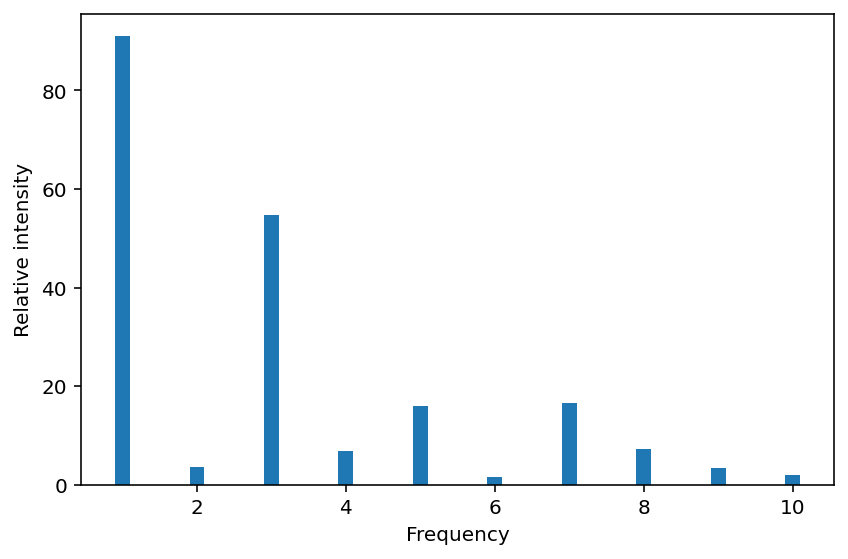

In [20]:
plt.bar(harmonics, harm_int_clar, width=0.2, bottom=None, align='center', data=None,)
plt.ylabel('Relative intensity')
plt.xlabel("Frequency")
plt.tight_layout()

plt.savefig("slides-powerspectrum_clar.svg",transparent=True)
plt.savefig("slides-powerspectrum_clar.pdf",transparent=True)

plt.show()



## Some important fourier transforms

### Cosine wave

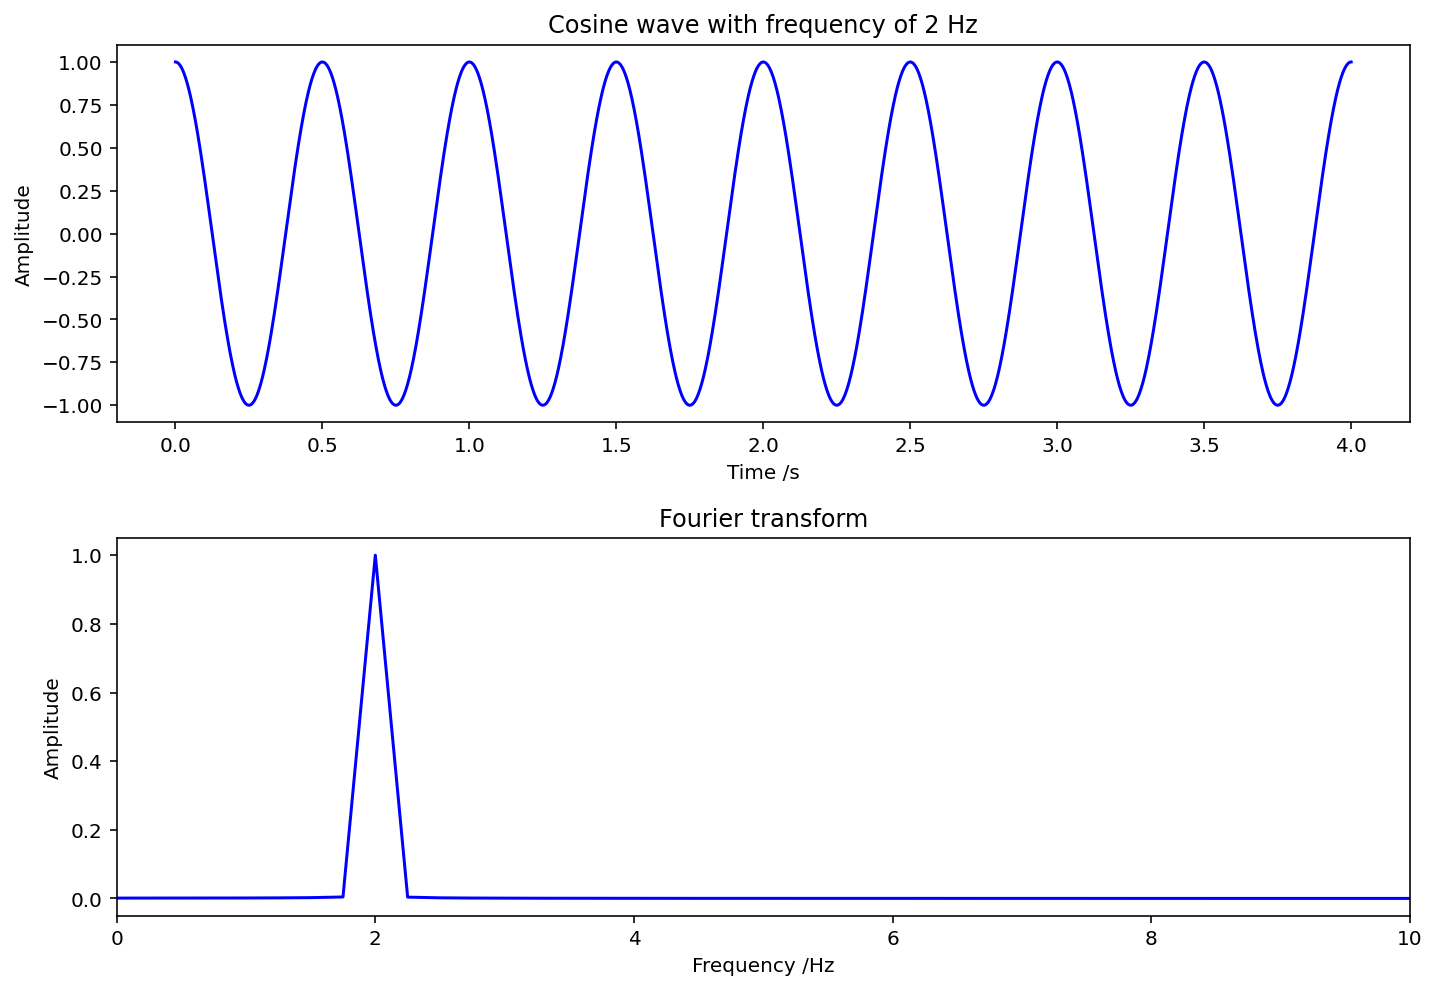

In [21]:
# Define a time series
start_time = 0
end_time = 4
measurements=300
sampling_freq = 500  # Hz

#step_size =end_time/measurements
#sampling_freq = 1/step_size

#times = np.arange(start_time,end_time,step_size)
# Change to use linspace
times = np.linspace(start_time,end_time,end_time*sampling_freq)

# Wave frenquencies
freq_1 = 2

# Defining the waves and the convolution
wave_1 = np.cos(2*np.pi*freq_1*times)
#wave_2 = np.sin(2*np.pi*freq_2*times)

wave_tot = wave_1

figure,axis = plt.subplots(2,1,figsize=(10,7))
plt.subplots_adjust(hspace=0.5)

# Cosine wave
axis[0].set_title('Cosine wave with frequency of 2 Hz')
axis[0].plot(times,wave_tot,color='b')
axis[0].set_xlabel('Time /s')
axis[0].set_ylabel('Amplitude')

# Fourier transform

fourier1 = 2*np.fft.fft(wave_tot)/len(wave_tot) # Normalised fourier intensity
fourier1 = fourier1[range(int(len(wave_tot)/2))] # Tidying up, getting rid of sampling frequencies
# Idea from https://pythontic.com/visualization/signals/fouriertransform_fft

fourier_freqs = np.fft.fftfreq(len(wave_tot))*sampling_freq
fourier_freqs = fourier_freqs[range(int(len(wave_tot)/2))]

axis[1].set_title('Fourier transform')
axis[1].plot(fourier_freqs,abs(fourier1),color='b')
axis[1].set_xlabel('Frequency /Hz')
axis[1].set_ylabel('Amplitude')
axis[1].set_xlim(0,10)

#axis[2].set_title('Fourier transform (full range)')
#axis[2].plot(fourier_freqs,abs(fourier1),color='b')
#axis[2].plot(-1*fourier_freqs,abs(fourier1),color='b')
#axis[2].set_xlabel('Frequency /Hz')
#axis[2].set_ylabel('Amplitude')
#axis[2].set_xlim(-5,5)

#plt.figure(figsize=(20,7))
#plt.plot(times,wave_tot,color='b')
#plt.show()
plt.tight_layout()
plt.savefig('ch11-ftcosinefunction1.pdf',transparent=True)
plt.savefig('ch11-ftcosinefunction1.svg',transparent=True)

### Top hat function

Generate a top-hat function between -1 and 1
* Create a data series...
* Zero array between -5 and 5
* 1 array bewteen -1 and 1
* add them...
Suggest following method
* create n zeroes to cover range of 1
* create n 1s to cover range of 1
* 4* zeroes, 2 * 1s, 4* zeros 

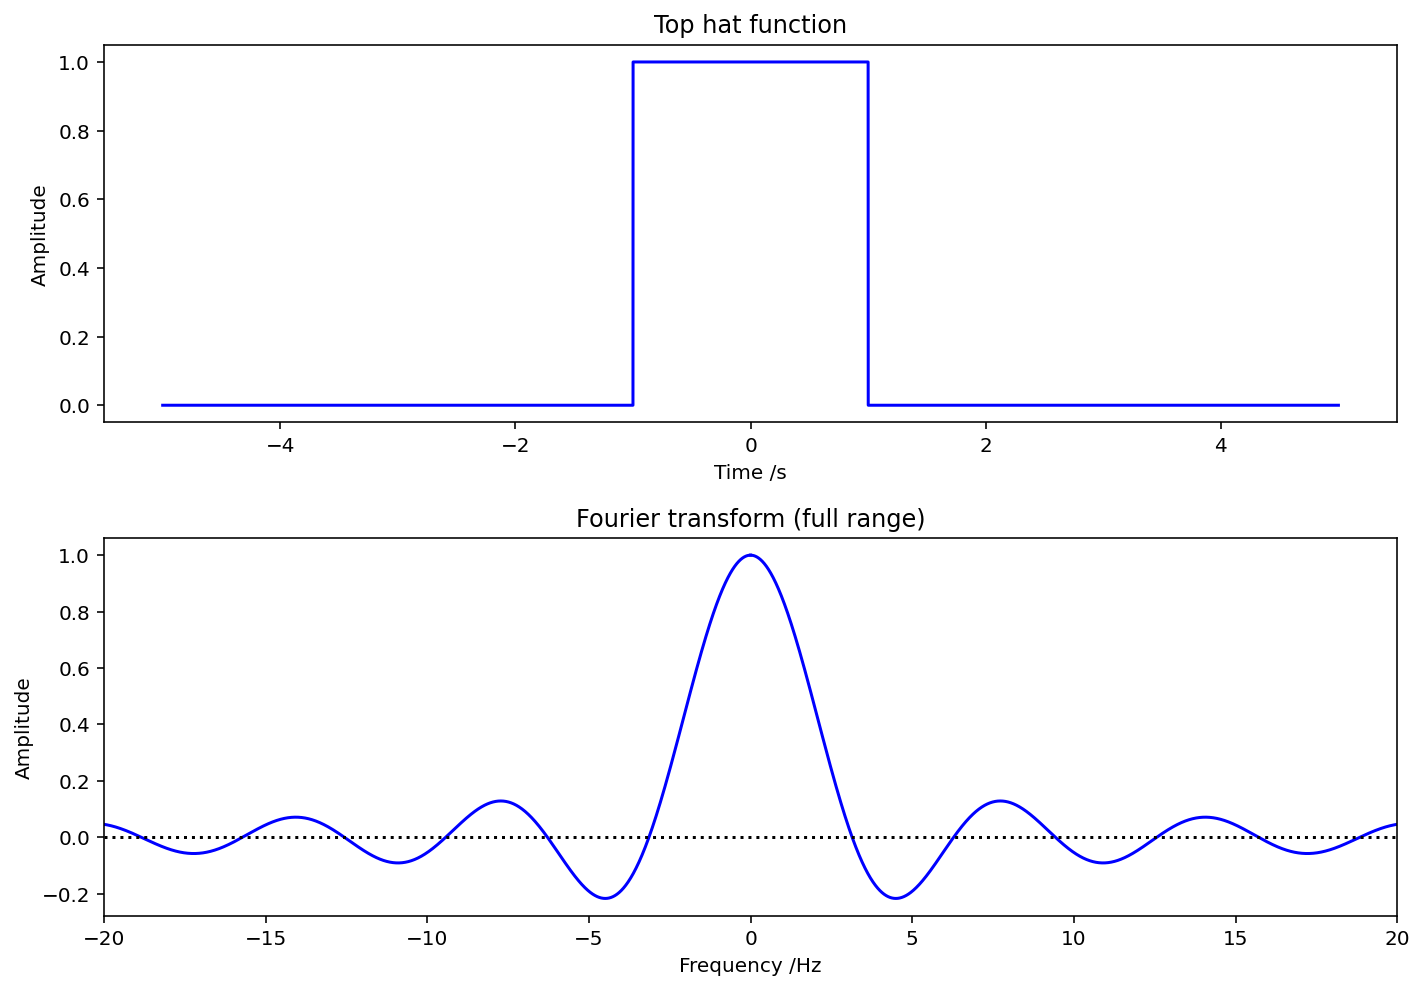

In [25]:
sample_rate = 10000# Hz
start_time = 0
end_time = 10
hat_width = 2
# Approach to create arrays:
# 1. Create a zero array
zero_arr = np.zeros(sample_rate,dtype=float)
# 2. Create the one_array
one_arr = zero_arr + 1
# 3. Create top-hat
top_hat = np.concatenate((zero_arr,zero_arr,zero_arr,zero_arr,one_arr,one_arr,zero_arr,zero_arr,zero_arr,zero_arr),axis=0)

# Create time array
times = np.linspace(start_time,end_time,end_time*sample_rate)

figure,axis = plt.subplots(2,1,figsize=(10,7))
plt.subplots_adjust(hspace=0.5)

# Cosine wave
axis[0].set_title('Top hat function')
axis[0].plot(times-5,top_hat,color='b')
axis[0].set_xlabel('Time /s')
axis[0].set_ylabel('Amplitude')

# Fourier transform

fourier1 = 1*np.fft.fft(top_hat)/len(top_hat) # Normalised fourier intensity
fourier1 = fourier1[range(int(len(top_hat)/2))] # Tidying up, getting rid of sampling frequencies
# Idea from https://pythontic.com/visualization/signals/fouriertransform_fft

fourier_freqs = np.fft.fftfreq(len(top_hat))*sampling_freq
fourier_freqs = fourier_freqs[range(int(len(top_hat)/2))]

#axis[1].set_title('Fourier transform')
#axis[1].plot(fourier_freqs,(fourier1),color='b')
#axis[1].set_xlabel('Frequency /Hz')
#axis[1].set_ylabel('Amplitude')
#axis[1].set_xlim(0,10)

axis[1].set_title('Fourier transform (full range)')
axis[1].plot(fourier_freqs,np.sinc(fourier_freqs*hat_width/(2*np.pi)),color='b')
axis[1].plot(-1*fourier_freqs,np.sinc(fourier_freqs*hat_width/(2*np.pi)),color='b')
axis[1].axhline(y=0, xmin=0, xmax=1,color='black',linestyle='dotted')
axis[1].set_xlabel('Frequency /Hz')
axis[1].set_ylabel('Amplitude')
axis[1].set_xlim(-20,20)

#plt.figure(figsize=(20,7))
#plt.plot(times,wave_tot,color='b')
#plt.show()
plt.tight_layout()
plt.savefig('ch11-fttophat1.pdf',transparent=True)
plt.savefig('ch11-fttophat1.svg',transparent=True)

### Gaussian function


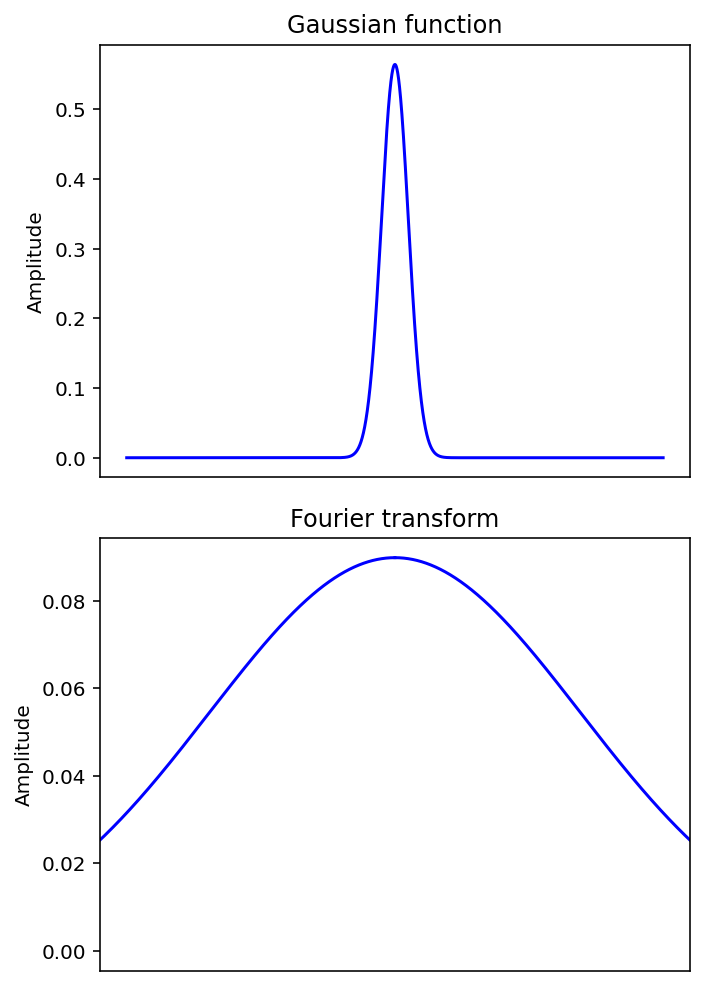

In [38]:
sample_rate = 10000# Hz
start_time = 0
end_time = 40

times = np.linspace(start_time,end_time,end_time*sample_rate)

sigma = 1
mean_val = 20

FWHM_1 = sigma*2*np.sqrt(2*np.log(2))
sigma_2 = 2*np.pi / sigma
mean_val_2 = 0

gaussian_time = (1/(sigma*(np.pi**0.5)))*np.exp(-0.5*(((times - mean_val)/sigma)**2))


figure,axis = plt.subplots(2,1,figsize=(5,7))
plt.subplots_adjust(hspace=0.5)

# Cosine wave
axis[0].set_title('Gaussian function')
axis[0].plot(times-mean_val,gaussian_time,color='b')
axis[0].get_xaxis().set_visible(False)
axis[0].set_xlabel('Time /s')
axis[0].set_ylabel('Amplitude')

# Fourier transform

fourier1 = 1*np.fft.fft(gaussian_time)/len(gaussian_time) # Normalised fourier intensity
fourier1 = fourier1[range(int(len(gaussian_time)/2))] # Tidying up, getting rid of sampling frequencies
# Idea from https://pythontic.com/visualization/signals/fouriertransform_fft

fourier_freqs = np.fft.fftfreq(len(gaussian_time))*sampling_freq
fourier_freqs = fourier_freqs[range(int(len(gaussian_time)/2))]

#axis[1].set_title('Fourier transform')
#axis[1].plot(fourier_freqs,(fourier1),color='b')
#axis[1].set_xlabel('Frequency /Hz')
#axis[1].set_ylabel('Amplitude')
#axis[1].set_xlim(0,20)

gaussian_2 = (1/(sigma_2*(np.pi**0.5)))*np.exp(-0.5*(((fourier_freqs - mean_val_2)/sigma_2)**2))


axis[1].set_title('Fourier transform')
axis[1].plot(fourier_freqs,gaussian_2,color='b')
axis[1].plot(-1*fourier_freqs,gaussian_2,color='b')
axis[1].get_xaxis().set_visible(False)
axis[1].set_xlabel('Frequency /Hz')
axis[1].set_ylabel('Amplitude')
axis[1].set_xlim(-10,10)

#plt.figure(figsize=(20,7))
#plt.plot(times,wave_tot,color='b')
#plt.show()
plt.tight_layout()
plt.savefig('ch11-ftgaussian1_thin.pdf',transparent=True)
plt.savefig('ch11-ftgaussian1_thin.svg',transparent=True)

In [94]:
gaussian_time

0.5641895835477563

In [103]:
2*np.sqrt(2*np.log(2))

2.3548200450309493

## Answering discussion board question

>I was just confused about the comment "some harmonics deliver more power than others. For a square wave, most power is in the lower frequencies, much of the structure is in the lower frequencies". Please may you explain this? 

Suggested reply - to build the square wave in reverse


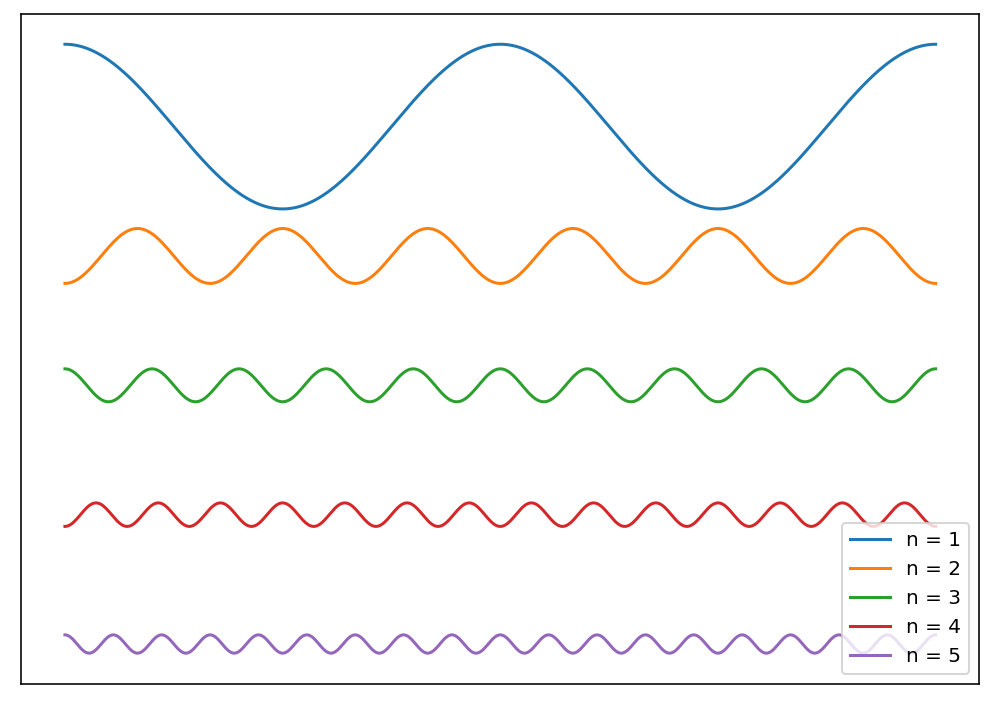

In [58]:
time_t = np.linspace(-2,2,1000)
term_0 = 0.5
series_lim = 10
n = np.arange(1,series_lim+1)
neg = np.arange(series_lim,0,-1)
number = np.arange(1,6)

#def fourier1(n,x):
#    term = (2/np.pi)*(np.cos(n*np.pi*x)/n)*((-1)**(n*(n-2)*0.5))
#    return term

pulse_data = np.zeros(len(time_t),dtype=float)

def fourier(n,x):
    term = ((np.cos((2*n-1)*np.pi*x))/(2*n-1))*((-1)**(n+1))
    return term

for i in n:
    fourier_term = fourier(i,time_t)
    np.add(fourier_term,pulse_data,out=pulse_data)
    
plt.figure(figsize=(7,5))

for i in number:
    term = (0.5+(2/np.pi)*fourier(i,time_t))
    plt.plot(time_t,term-i,label='n = '+str(i))

#plt.plot(time_t,(0.5+(2/np.pi)*pulse_data),label='n = '+str(series_lim))
#plt.plot(time_t,,label='1',)# color='b')
#plt.plot(time_t,(0.5+(2/np.pi)*fourier(2,time_t))+1.5,label='1',)#color='b')
#
#plt.plot(time_t,(0.5+(2/np.pi)*fourier(3,time_t))+2.2,label='1')#,color='b')
#
#plt.plot(time_t,(0.5+(2/np.pi)*fourier(4,time_t))+3.1,label='1')#,color='b')
#
#plt.plot(time_t,(0.5+(2/np.pi)*fourier(5,time_t))+4,label='1')#,color='b')




ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


plt.ylabel('$P(t)$')
plt.xlabel("Time, $t$ /s")
plt.legend(loc='lower right')
#plt.text(1.5, 0, 'n= '+str(series_lim),fontsize='20' )

plt.tight_layout()


plt.savefig("forum1-fouriersum-frequencies.png",transparent=True)
plt.savefig("forum1-fouriersum-frequencies.pdf",transparent=True)
plt.show()

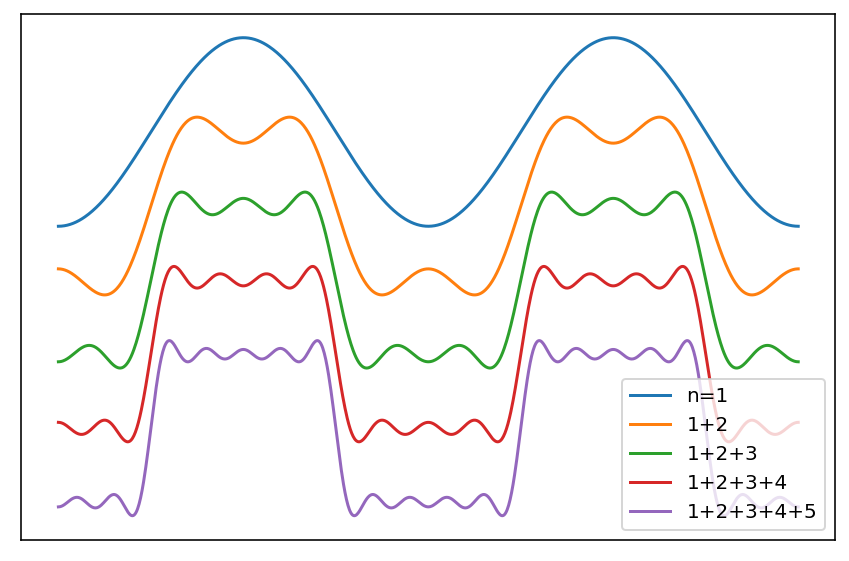

In [59]:

fourier1 = (0.5+(2/np.pi)*fourier(1,time_t))
fourier2 = (0.5+(2/np.pi)*fourier(2,time_t))
fourier3 = (0.5+(2/np.pi)*fourier(3,time_t))
fourier4 = (0.5+(2/np.pi)*fourier(4,time_t))
fourier5 = (0.5+(2/np.pi)*fourier(5,time_t))


plt.plot(time_t,(-fourier1),label='n=1')
plt.plot(time_t,(-fourier1-fourier2),label='1+2')
plt.plot(time_t,(-fourier1-fourier2-fourier3),label='1+2+3')
plt.plot(time_t,(-fourier1-fourier2-fourier3-fourier4),label='1+2+3+4')
plt.plot(time_t,(-fourier1-fourier2-fourier3-fourier4-fourier5),label='1+2+3+4+5')



ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


plt.ylabel('$P(t)$')
plt.xlabel("Time, $t$ /s")
plt.legend(loc='lower right')
#plt.text(1.5, 0, 'n= '+str(series_lim),fontsize='20' )

plt.tight_layout()


plt.savefig("forum1-fouriersum-forward.png",transparent=True)
plt.savefig("forum1-fouriersum-forward.pdf",transparent=True)
plt.show()

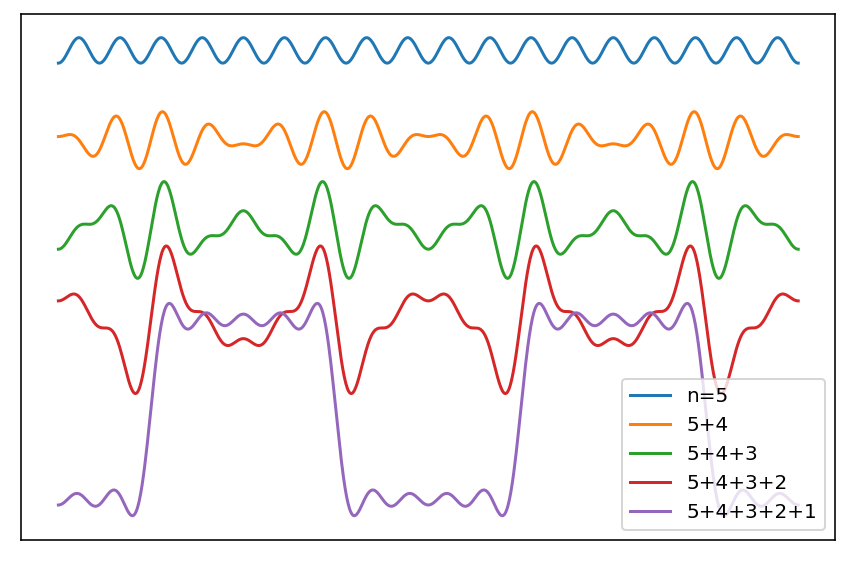

In [60]:
plt.plot(time_t,(-fourier5),label='n=5')
plt.plot(time_t,(-fourier5-fourier4),label='5+4')
plt.plot(time_t,(-fourier5-fourier4-fourier3),label='5+4+3')
plt.plot(time_t,(-fourier5-fourier4-fourier3-fourier2),label='5+4+3+2')
plt.plot(time_t,(-fourier5-fourier4-fourier3-fourier2-fourier1),label='5+4+3+2+1')



ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


plt.ylabel('$P(t)$')
plt.xlabel("Time, $t$ /s")
plt.legend(loc='lower right')
#plt.text(1.5, 0, 'n= '+str(series_lim),fontsize='20' )

plt.tight_layout()


plt.savefig("forum1-fouriersum-reverse.png",transparent=True)
plt.savefig("forum1-fouriersum-reverse.pdf",transparent=True)
plt.show()

In [16]:
neg

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [9]:
neg

array([], dtype=int64)